In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
!pip install sqlalchemy


In [3]:
df = pd.read_csv('Life Expectancy Data.csv', delimiter=',')
df.dataframeName = 'Life Expectancy Data.csv'

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
# Renaming some column names as they contain trailing spaces.

df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   object 
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   object 
 3   Life_Expectancy           2928 non-null   float64
 4   Adult_Mortality           2928 non-null   float64
 5   Infant_Deaths             2938 non-null   int64  
 6   Alcohol                   2744 non-null   float64
 7   Percentage_Exp            2938 non-null   float64
 8   HepatitisB                2385 non-null   float64
 9   Measles                   2938 non-null   int64  
 10  BMI                       2904 non-null   float64
 11  Under_Five_Deaths         2938 non-null   int64  
 12  Polio                     2919 non-null   float64
 13  Tot_Exp                   2712 non-null   float64
 14  Diphther

In [7]:
# Identify percentage of null values in each column.
df.isnull().sum().sum()

2563

In [8]:
df = pd.read_csv('Life Expectancy Data.csv', delimiter=',')
df.dataframeName = 'Life Expectancy Data.csv'

In [9]:
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   object 
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   object 
 3   Life_Expectancy           2928 non-null   float64
 4   Adult_Mortality           2928 non-null   float64
 5   Infant_Deaths             2938 non-null   int64  
 6   Alcohol                   2744 non-null   float64
 7   Percentage_Exp            2938 non-null   float64
 8   HepatitisB                2385 non-null   float64
 9   Measles                   2938 non-null   int64  
 10  BMI                       2904 non-null   float64
 11  Under_Five_Deaths         2938 non-null   int64  
 12  Polio                     2919 non-null   float64
 13  Tot_Exp                   2712 non-null   float64
 14  Diphther

In [10]:
df.isnull().sum()*100/df.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_1to19_years         1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

In [11]:
df.isnull().sum().sum() 
#total number of missing values

2563

In [12]:
country_list = df.Country.unique()#to get unique values from 
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB',
             'BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years',
             'thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

In [13]:
#Removing null values using interpolate()
for country in country_list:
    df.loc[df['Country'] == country,fill_list] =  df.loc[df['Country'] == country,fill_list].interpolate()
    #created for loop to take country wise column range
    
# Dropping remaining null values after interpolation.
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Percentage_Exp              0
HepatitisB                  0
Measles                     0
BMI                         0
Under_Five_Deaths           0
Polio                       0
Tot_Exp                     0
Diphtheria                  0
HIV/AIDS                    0
GDP                         0
Population                  0
thinness_1to19_years        0
thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
dtype: int64

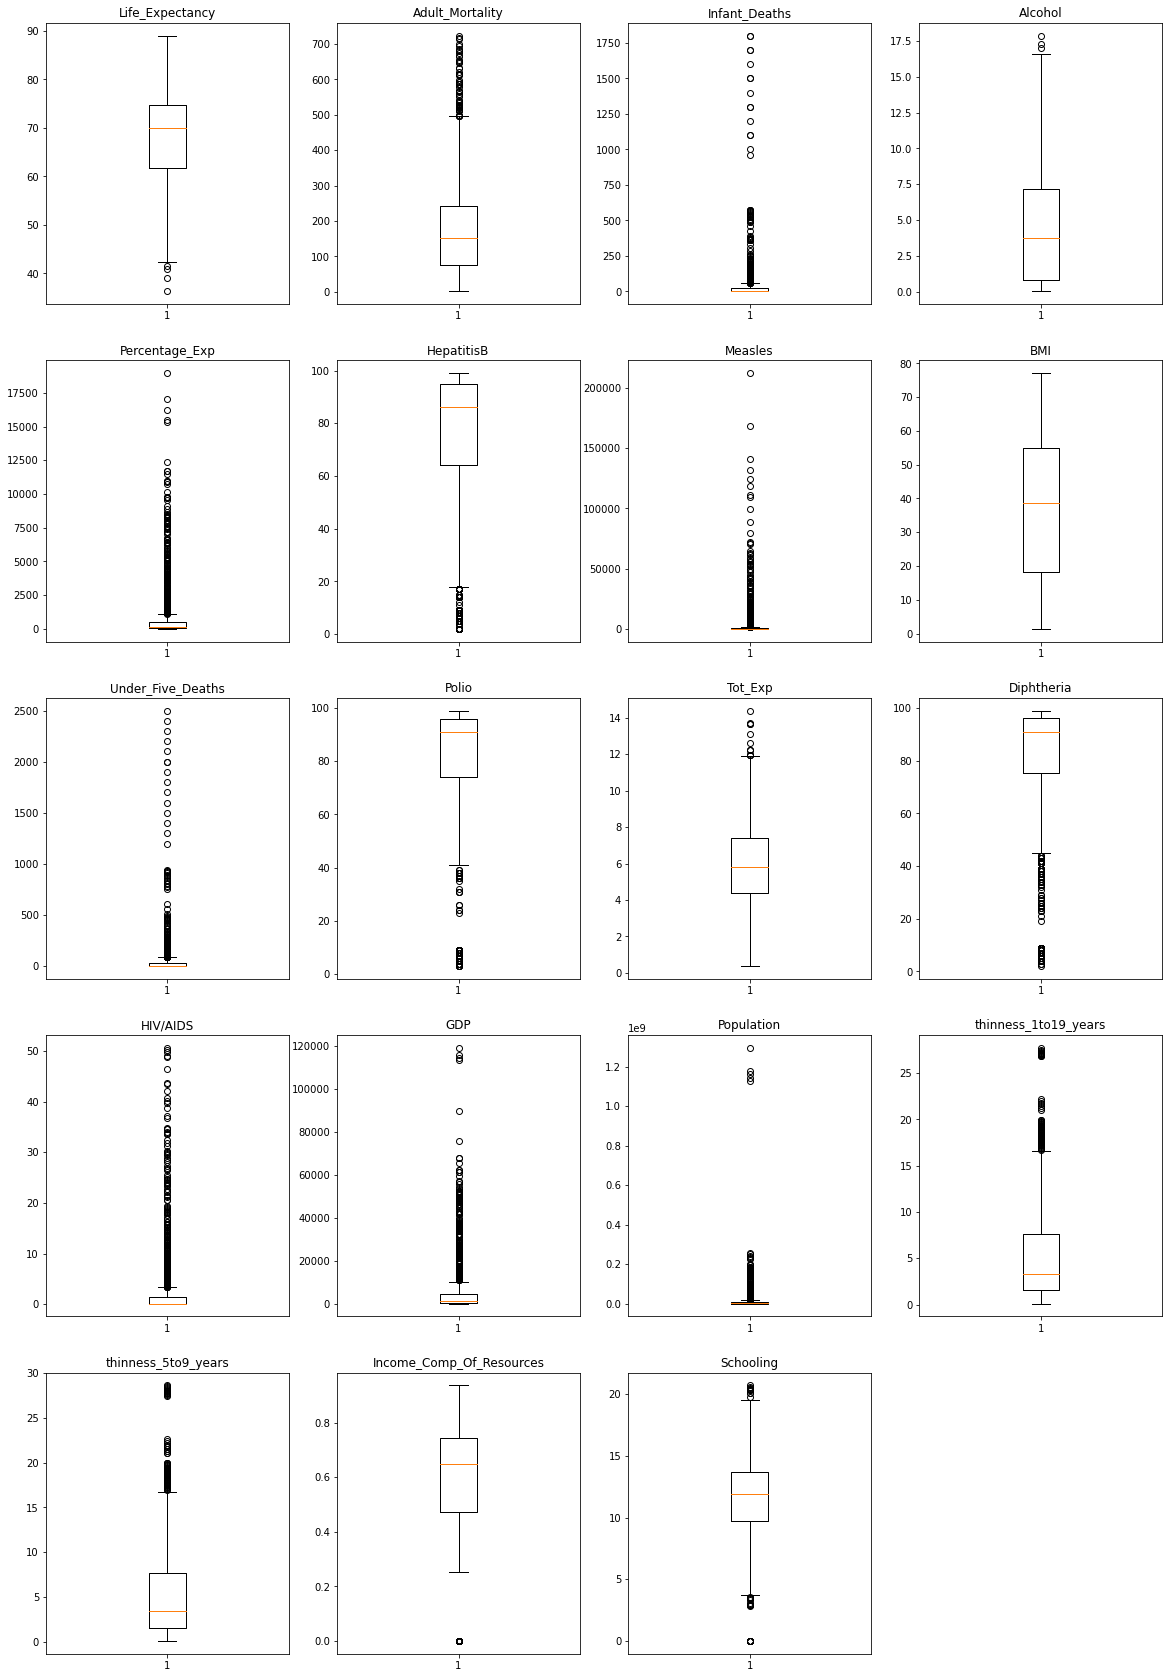

In [15]:
#There were data values that were too far from other values in our taken sample i.e outliers 
#Detecting outliers
# Create a dictionary of columns.
column_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,'HepatitisB':6,'Measles':7,'BMI':8,'Under_Five_Deaths':9,'Polio':10,'Tot_Exp':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'thinness_1to19_years':16,'thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in column_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [16]:
a=0
for variable in column_dict.keys():
    q3, q1 = np.percentile(df[variable], [75 ,25]) #q3 is 75% Quartile and q1 is 25%
    iqr = q3 - q1
                                                                                  #len((np.where((df[variable] > max_val) | (df[variable] < min_val))[0]))                  
    min_val = q1 - (iqr*1.5)
    max_val = q3 + (iqr*1.5)
    a+=len(np.where((df[variable] > max_val) |(df[variable] < min_val))[0])
    print(np.where((df[variable] > max_val) |(df[variable] < min_val))[0])
    print("Current length is",a)
print(a)    

[ 798 1630 1632 1633]
Current length is 4
[ 251  252  253  254  255  256  386  387  598  798 1019 1020 1021 1023
 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1100 1101 1102 1104
 1105 1107 1108 1629 1631 1632 1633 1657 1658 1659 1717 1721 1722 1723
 1894 1895 1896 1965 1966 1967 1970 1971 1976 1977 1978 1981 1982 1983
 1985 1986]
Current length is 62
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   47   48   49   50   51   52   53   54   55   56   57   58
   59   60   61  137  138  139  140  141  142  143  144  145  146  147
  148  149  150  151  264  265  266  267  268  269  270  271  361  422
  423  424  425  426  427  428  429  430  431  432  433  434  435  436
  614  615  616  617  618  619  620  621  622  623  624  625  626  627
  628  824  825  826  827  828  829  830  831  832  833  834  835  836
  837  838  839  840  841  842  843  844  845  846  847  848  849  850
  851  852  853  964  965  966  967  968  969  970  971  972  973 1260
 1

In [17]:
for variable in column_dict.keys():
    q3, q1 = np.percentile(df[variable], [75 ,25]) #q3 is 75% Quartile and q1 is 25%
    iqr = q3 - q1
                                                                                  #len((np.where((df[variable] > max_val) | (df[variable] < min_val))[0]))                  
    min_val = q1 - (iqr*1.5)
    max_val = q3 + (iqr*1.5)
    k=np.where((df[variable] > max_val) |(df[variable] < min_val))
    print(df.iloc[k]) #integer-location based indexing for selection by position.

           Country  Year      Status  Life_Expectancy  Adult_Mortality  \
1127         Haiti  2010  Developing             36.3            682.0   
2309  Sierra Leone  2003  Developing             41.5             57.0   
2311  Sierra Leone  2001  Developing             41.0            519.0   
2312  Sierra Leone  2000  Developing             39.0            533.0   

      Infant_Deaths  Alcohol  Percentage_Exp  HepatitisB  Measles  ...  Polio  \
1127             23     5.76       36.292918        68.0        0  ...   66.0   
2309             30     4.07       38.614732        63.0      586  ...   66.0   
2311             30     4.21       33.346915        63.0      649  ...   38.0   
2312             29     3.97       20.395683        63.0     3575  ...   46.0   

      Tot_Exp  Diphtheria  HIV/AIDS         GDP  Population  \
1127     8.90        66.0       1.9  662.279518   9999617.0   
2309    11.69        73.0       1.9  263.761831   5199549.0   
2311    11.83        38.0       1.

[198 rows x 22 columns]
     Country  Year      Status  Life_Expectancy  Adult_Mortality  \
228  Belarus  2011  Developing             72.0            232.0   
873  Estonia  2008  Developing             74.2            167.0   
874  Estonia  2007  Developing             73.0            189.0   

     Infant_Deaths  Alcohol  Percentage_Exp  HepatitisB  Measles  ...  Polio  \
228              0    17.31      846.911307        98.0       50  ...   98.0   
873              0    16.99      225.072362        94.0        0  ...   95.0   
874              0    17.87     1904.124690        95.0        1  ...   95.0   

     Tot_Exp  Diphtheria  HIV/AIDS          GDP  Population  \
228     4.92        98.0       0.1   6519.71753   9473172.0   
873     6.60        95.0       0.1   1894.54850     13379.0   
874     5.16        95.0       0.1  16586.45200     13468.0   

     thinness_1to19_years  thinness_5to9_years  Income_Comp_Of_Resources  \
228                   2.0                  2.1       

[0 rows x 22 columns]
          Country  Year      Status  Life_Expectancy  Adult_Mortality  \
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
5     Afghanistan  2010  Developing             58.8            279.0   
6     Afghanistan  2009  Developing             58.6            281.0   
...           ...   ...         ...              ...              ...   
2725       Uganda  2004  Developing             51.3            485.0   
2726       Uganda  2003  Developing             51.0             53.0   
2727       Uganda  2002  Developing             48.8            523.0   
2728       Uganda  2001  Developing             47.7            539.0   
2729       Uganda  2000  Developing             46.6            554.0   

      Infant_Deaths  Alcohol  Percentage_Exp  HepatitisB  Measles  ...  Polio  \
2                66 

[195 rows x 22 columns]
       Country  Year      Status  Life_Expectancy  Adult_Mortality  \
339   Botswana  2012  Developing             63.4              3.0   
340   Botswana  2011  Developing             62.2            325.0   
341   Botswana  2010  Developing             61.1            349.0   
342   Botswana  2009  Developing             59.2            393.0   
343   Botswana  2008  Developing             57.5            427.0   
...        ...   ...         ...              ...              ...   
2933  Zimbabwe  2004  Developing             44.3            723.0   
2934  Zimbabwe  2003  Developing             44.5            715.0   
2935  Zimbabwe  2002  Developing             44.8             73.0   
2936  Zimbabwe  2001  Developing             45.3            686.0   
2937  Zimbabwe  2000  Developing             46.0            665.0   

      Infant_Deaths  Alcohol  Percentage_Exp  HepatitisB  Measles  ...  Polio  \
339               2     0.01       12.834474        95

[75 rows x 22 columns]
      Country  Year      Status  Life_Expectancy  Adult_Mortality  \
293    Bhutan  2010  Developing             67.9            228.0   
294    Bhutan  2009  Developing             67.4            232.0   
295    Bhutan  2008  Developing             67.0            234.0   
296    Bhutan  2007  Developing             66.5            238.0   
297    Bhutan  2006  Developing             65.8            245.0   
...       ...   ...         ...              ...              ...   
2853  Vanuatu  2004  Developing             69.6            169.0   
2854  Vanuatu  2003  Developing             69.4            173.0   
2855  Vanuatu  2002  Developing             69.3            176.0   
2856  Vanuatu  2001  Developing             69.1            179.0   
2857  Vanuatu  2000  Developing             69.0             18.0   

      Infant_Deaths  Alcohol  Percentage_Exp  HepatitisB  Measles  ...  Polio  \
293               1     0.28      244.039195        91.0       21  

[32 rows x 22 columns]


In [18]:
# Calculating number of outliers
for variable in column_dict.keys():#tking only keys
    q3, q1 = np.percentile(df[variable], [75 ,25]) #q3 is 75% Quartile and q1 is 25%
    iqr = q3 - q1
                                                                                  #len((np.where((df[variable] > max_val) | (df[variable] < min_val))[0]))                  
    min_val = q1 - (iqr*1.5)
    max_val = q3 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable
                                                                             ,   #np.where is used to extract values that meet condition
                                                                             len((np.where((df[variable] > max_val) |(df[variable] < min_val))[0]))
                                                                             ,
                                                                             len((np.where((df[variable] > max_val) | (df[variable] < min_val))[0]))*100/1987)
                                                                              )#1987 is country count each country has 16 cols approx 
    

Number of outliers and percentage of it in Life_Expectancy : 4 and 0.20130850528434827
Number of outliers and percentage of it in Adult_Mortality : 58 and 2.9189733266230498
Number of outliers and percentage of it in Infant_Deaths : 198 and 9.96477101157524
Number of outliers and percentage of it in Alcohol : 3 and 0.1509813789632612
Number of outliers and percentage of it in Percentage_Exp : 232 and 11.675893306492199
Number of outliers and percentage of it in HepatitisB : 216 and 10.870659285354806
Number of outliers and percentage of it in Measles : 361 and 18.16809260191243
Number of outliers and percentage of it in BMI : 0 and 0.0
Number of outliers and percentage of it in Under_Five_Deaths : 227 and 11.424257674886764
Number of outliers and percentage of it in Polio : 159 and 8.002013085052843
Number of outliers and percentage of it in Tot_Exp : 13 and 0.6542526421741318
Number of outliers and percentage of it in Diphtheria : 195 and 9.813789632611979
Number of outliers and perce

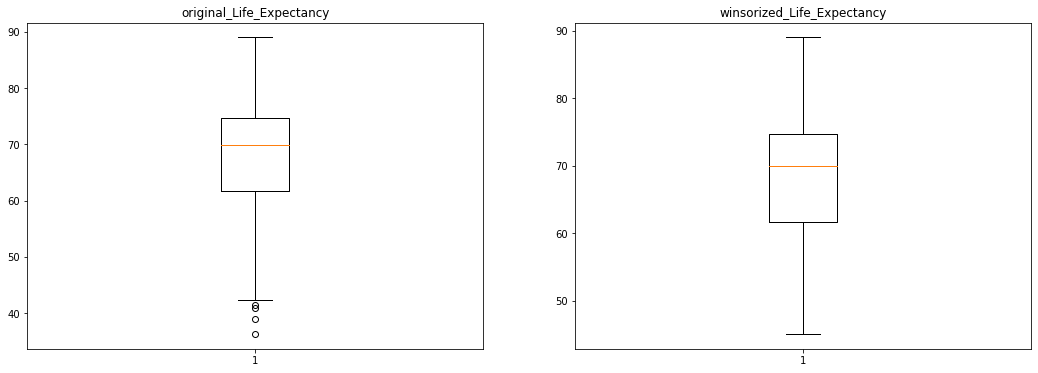

In [19]:
# Removing Outliers in the variables using Winsorization technique.
# Winsorize Life_Expectancy
# NOTE :which portion  outlier to remove can be only recieved by plotting original graph 
#  that's why couldn't use for loop for all column variables
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = df['Life_Expectancy']
plt.boxplot(original_Life_Expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(df['Life_Expectancy'],(0.01,0)) ##limits:nth percentile smallest data,nthpercentile largest data 
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.show()

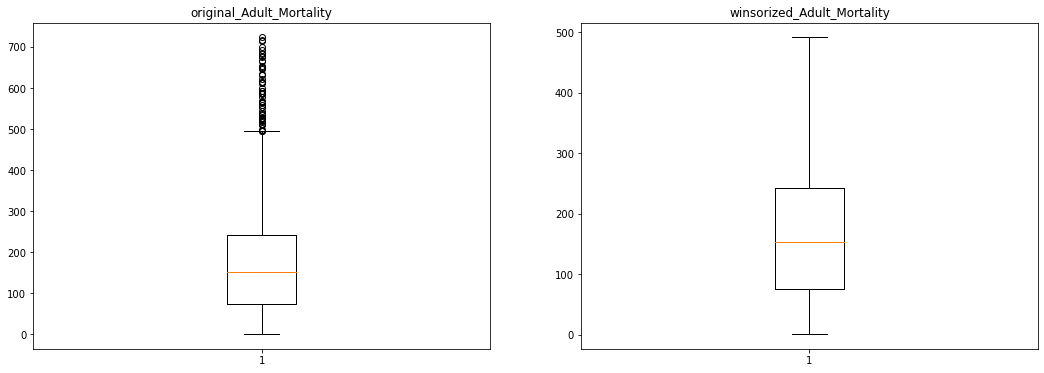

In [20]:
 #Winsorize Adult_Mortality
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = df['Adult_Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("original_Adult_Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(df['Adult_Mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

plt.show()

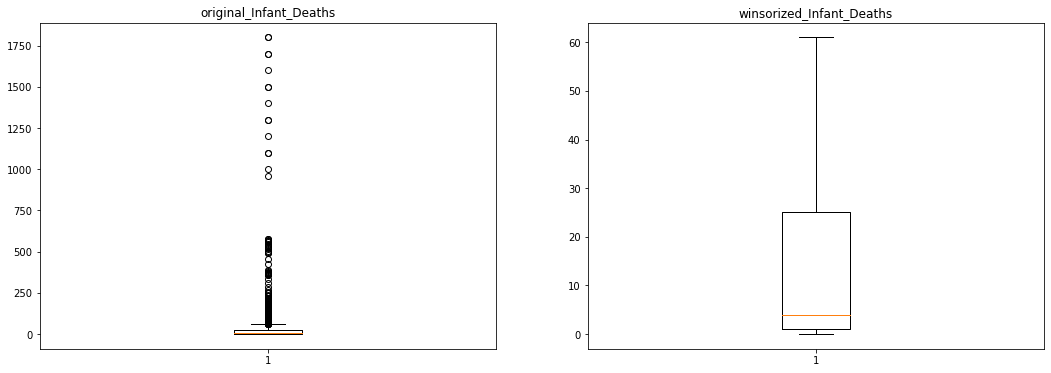

In [21]:
# Winsorize Infant_Deaths
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = df['Infant_Deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(df['Infant_Deaths'],(0,0.10))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.show()


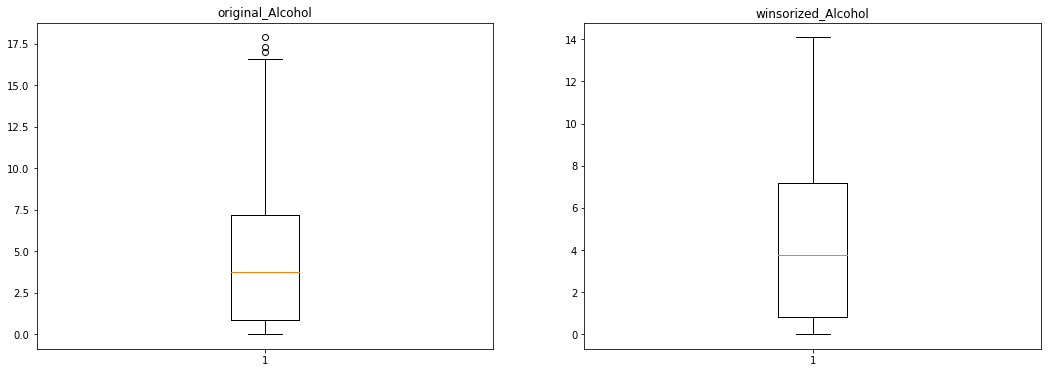

In [22]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol =df['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("original_Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(df['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.show()

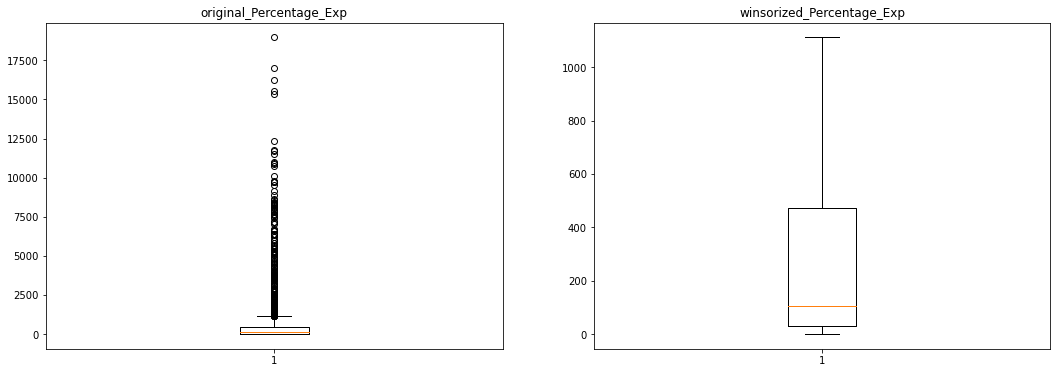

In [23]:
# Winsorize Percentage_Exp
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = df['Percentage_Exp']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(df['Percentage_Exp'],(0,0.12))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.show()

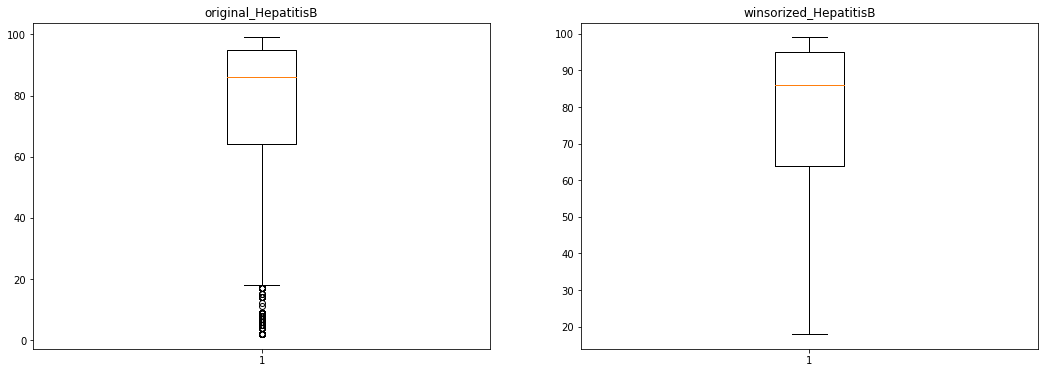

In [24]:
# Winsorize HepatitisB
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = df['HepatitisB']
plt.boxplot(original_HepatitisB)
plt.title("original_HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(df['HepatitisB'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.show()


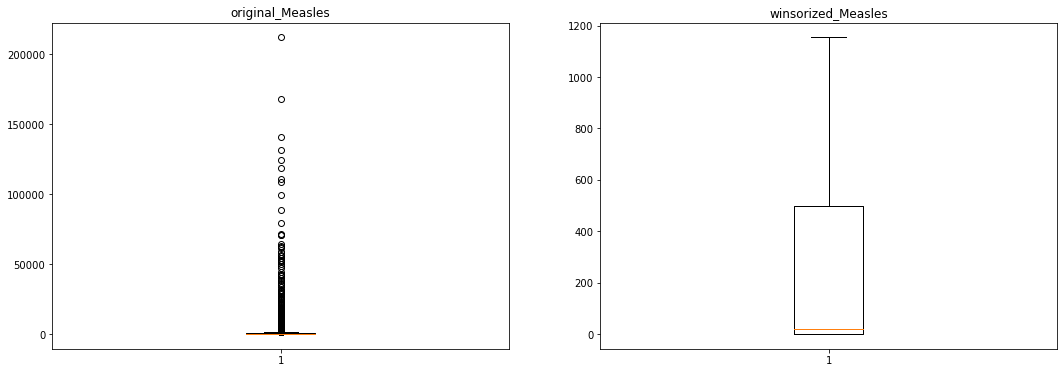

In [25]:
 #Winsorize Measles
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = df['Measles']
plt.boxplot(original_Measles)
plt.title("original_Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(df['Measles'],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.show()

In [26]:
#Measles data due to winsorization, 18% of data is changed, hence we will drop it
df = df.drop('Measles',axis=1)

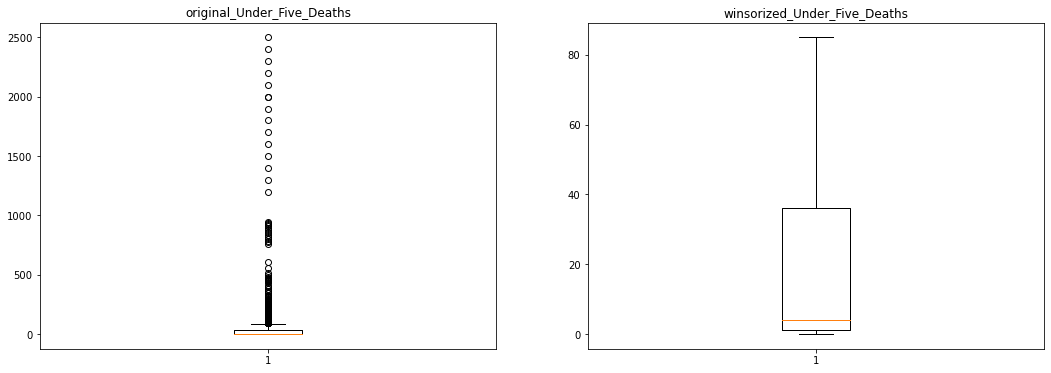

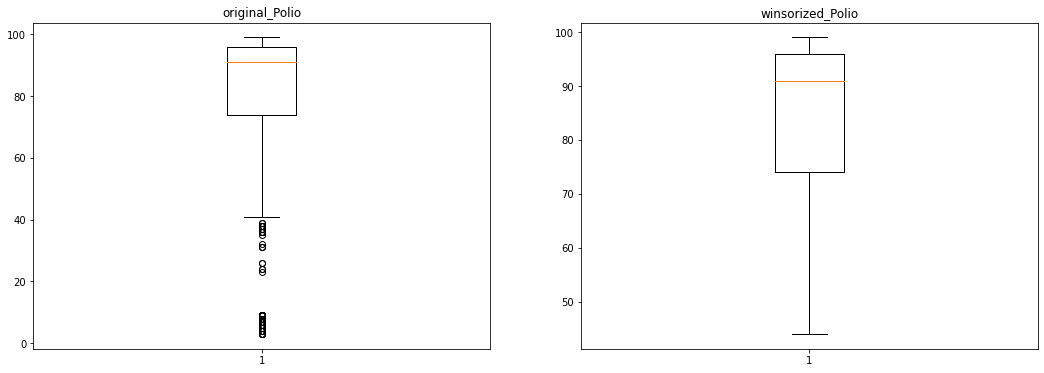

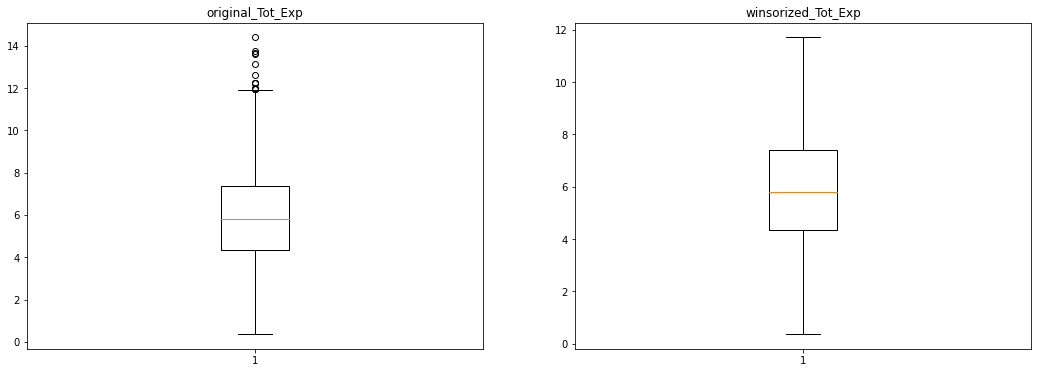

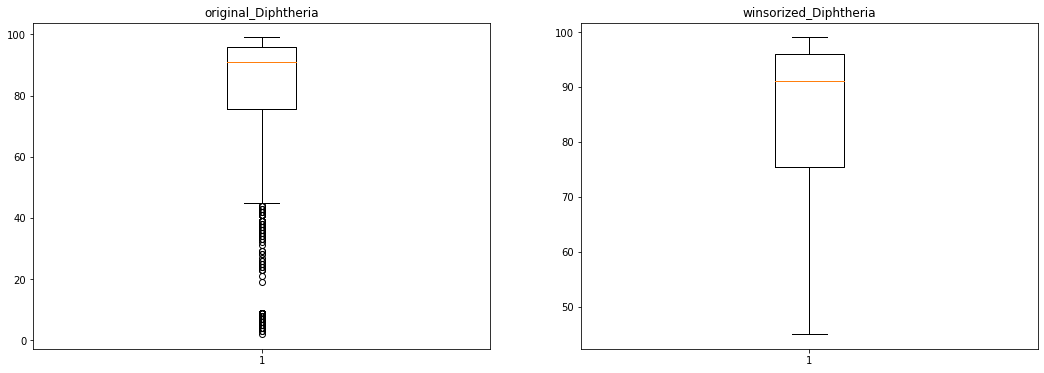

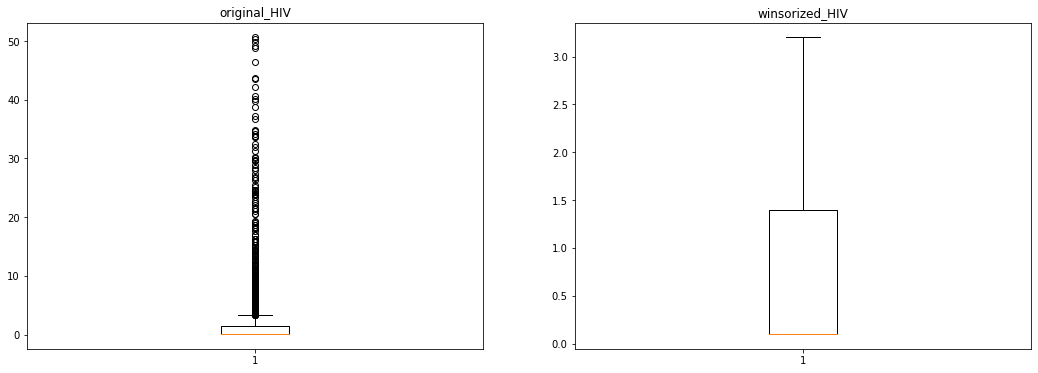

In [27]:
# Winsorize Under_Five_Deaths
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = df['Under_Five_Deaths']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(df['Under_Five_Deaths'],(0,0.12))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()
# Winsorize Polio

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = df['Polio']
plt.boxplot(original_Polio)
plt.title("original_Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(df['Polio'],(0.09,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.show()
## Winsorize Tot_Exp

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Tot_Exp = df['Tot_Exp']
plt.boxplot(original_Tot_Exp)
plt.title("original_Tot_Exp")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(df['Tot_Exp'],(0,0.01))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.show()

# Winsorize Diphtheria

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = df['Diphtheria']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(df['Diphtheria'],(0.10,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.show()

# Winsorize HIV/AIDS

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = df['HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("original_HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(df['HIV/AIDS'],(0,0.16))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.show()

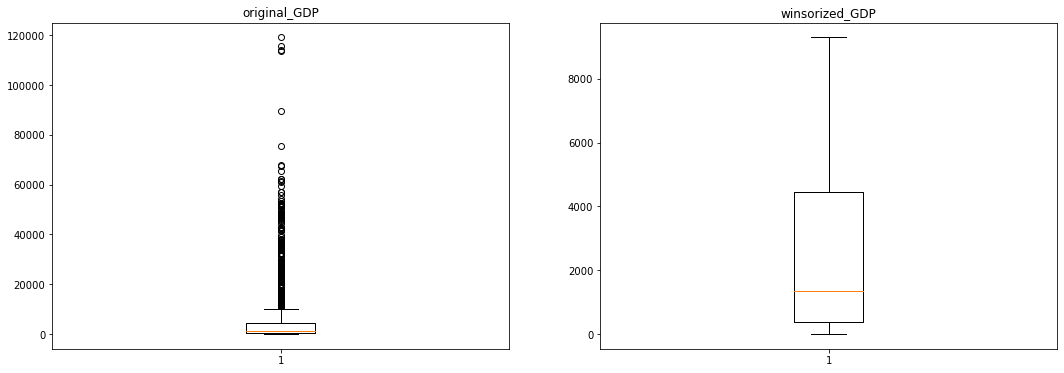

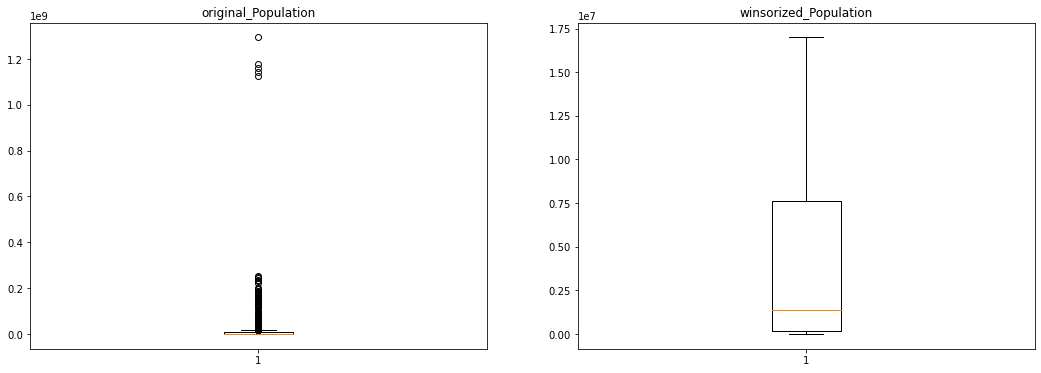

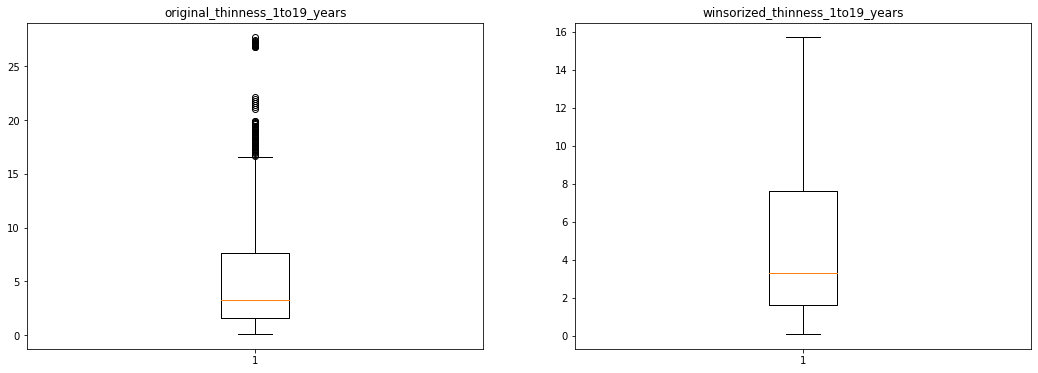

In [28]:
# Winsorize GDP
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = df['GDP']
plt.boxplot(original_GDP)
plt.title("original_GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(df['GDP'],(0,0.13))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.show()


# Winsorize Population

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = df['Population']
plt.boxplot(original_Population)
plt.title("original_Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(df['Population'],(0,0.14))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.show()
# Winsorize thinness_1to19_years


from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_1to19_years = df['thinness_1to19_years']
plt.boxplot(original_thinness_1to19_years)
plt.title("original_thinness_1to19_years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(df['thinness_1to19_years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.show()

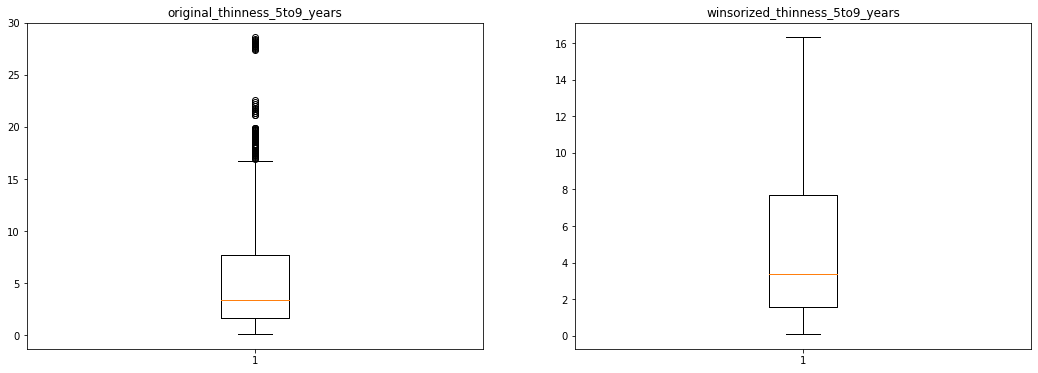

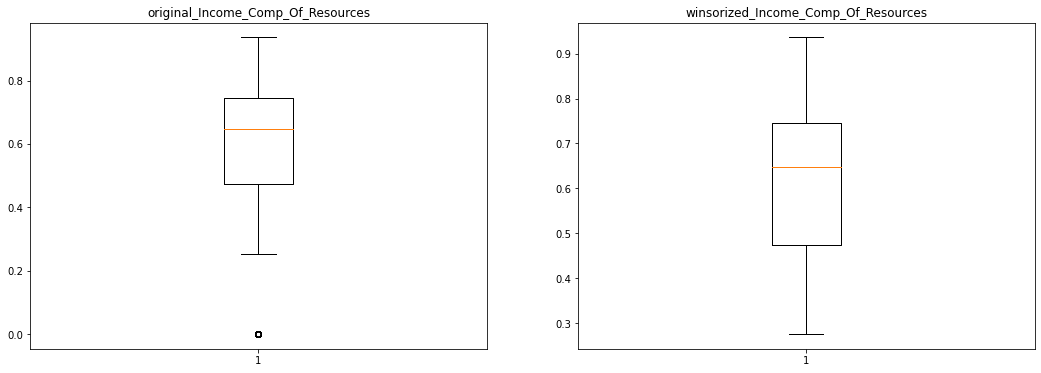

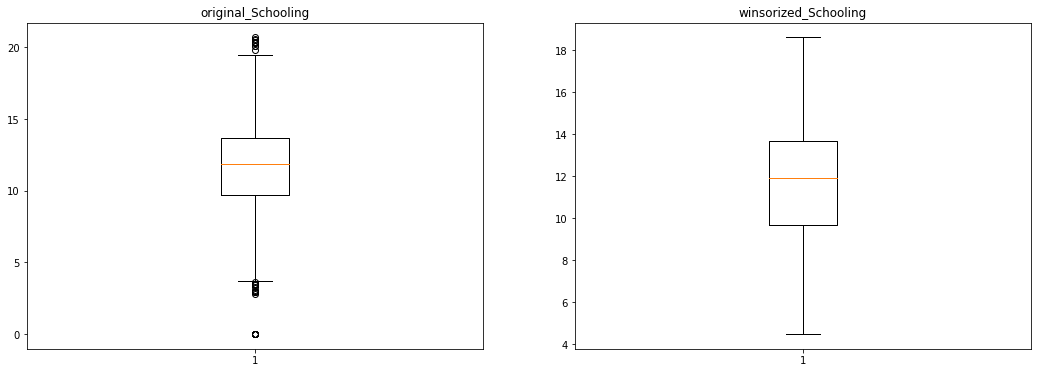

In [29]:
# Winsorize thinness_5to9_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = df['thinness_5to9_years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5to9_years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(df['thinness_5to9_years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.show()
# Winsorize Income_Comp_Of_Resources

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = df['Income_Comp_Of_Resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original_Income_Comp_Of_Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(df['Income_Comp_Of_Resources'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.show()
# Winsorize Schooling

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = df['Schooling']
plt.boxplot(original_Schooling)
plt.title("original_Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(df['Schooling'],(0.02,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()


In [30]:
win_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,
            winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,
            winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,
            winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,
            winsorized_Income_Comp_Of_Resources,winsorized_Schooling
           ]

for variable in win_list:
    q3, q2 = np.percentile(variable, [75 ,25])
    iqr = q3 - q2

    min_val = q2 - (iqr*1.5)
    max_val = q3 + (iqr*1.5)
    
    print("Number of outliers after winsorization : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


In [31]:
# Adding winsorized variables to the data frame.
df['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
df['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
df['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
df['winsorized_Alcohol'] = winsorized_Alcohol
df['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
df['winsorized_HepatitisB'] = winsorized_HepatitisB
df['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
df['winsorized_Polio'] = winsorized_Polio
df['winsorized_Tot_Exp'] = winsorized_Tot_Exp
df['winsorized_Diphtheria'] = winsorized_Diphtheria
df['winsorized_HIV'] = winsorized_HIV
df['winsorized_GDP'] = winsorized_GDP
df['winsorized_Population'] = winsorized_Population
df['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
df['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
df['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
df['winsorized_Schooling'] = winsorized_Schooling

In [32]:
df.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,BMI,Under_Five_Deaths,Polio,...,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000,...,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,67.981782,175.187217,36.623553,4.455644,685.492318,73.86160,36.428636,50.932562,80.371917,...,82.957725,5.895471,83.225969,0.874082,2864.719760,4.799769e+06,4.955561,5.024006,0.616143,11.658581
std,4.323147,9.706401,131.616942,138.784913,3.976733,1761.669050,29.02807,19.736138,188.933117,24.363376,...,17.556131,2.266421,17.239348,1.183198,3186.069874,6.217060e+06,4.187776,4.265385,0.174584,3.102260
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.00000,1.400000,0.000000,3.000000,...,44.000000,0.370000,45.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.276000,4.500000
25%,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,64.00000,18.150000,1.000000,74.000000,...,74.000000,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000
50%,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.00000,38.700000,4.000000,91.000000,...,91.000000,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000
75%,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,95.00000,55.000000,36.000000,96.000000,...,96.000000,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.00000,77.100000,2500.000000,99.000000,...,99.000000,11.700000,99.000000,3.200000,9291.227619,1.699335e+07,15.700000,16.300000,0.936000,18.600000


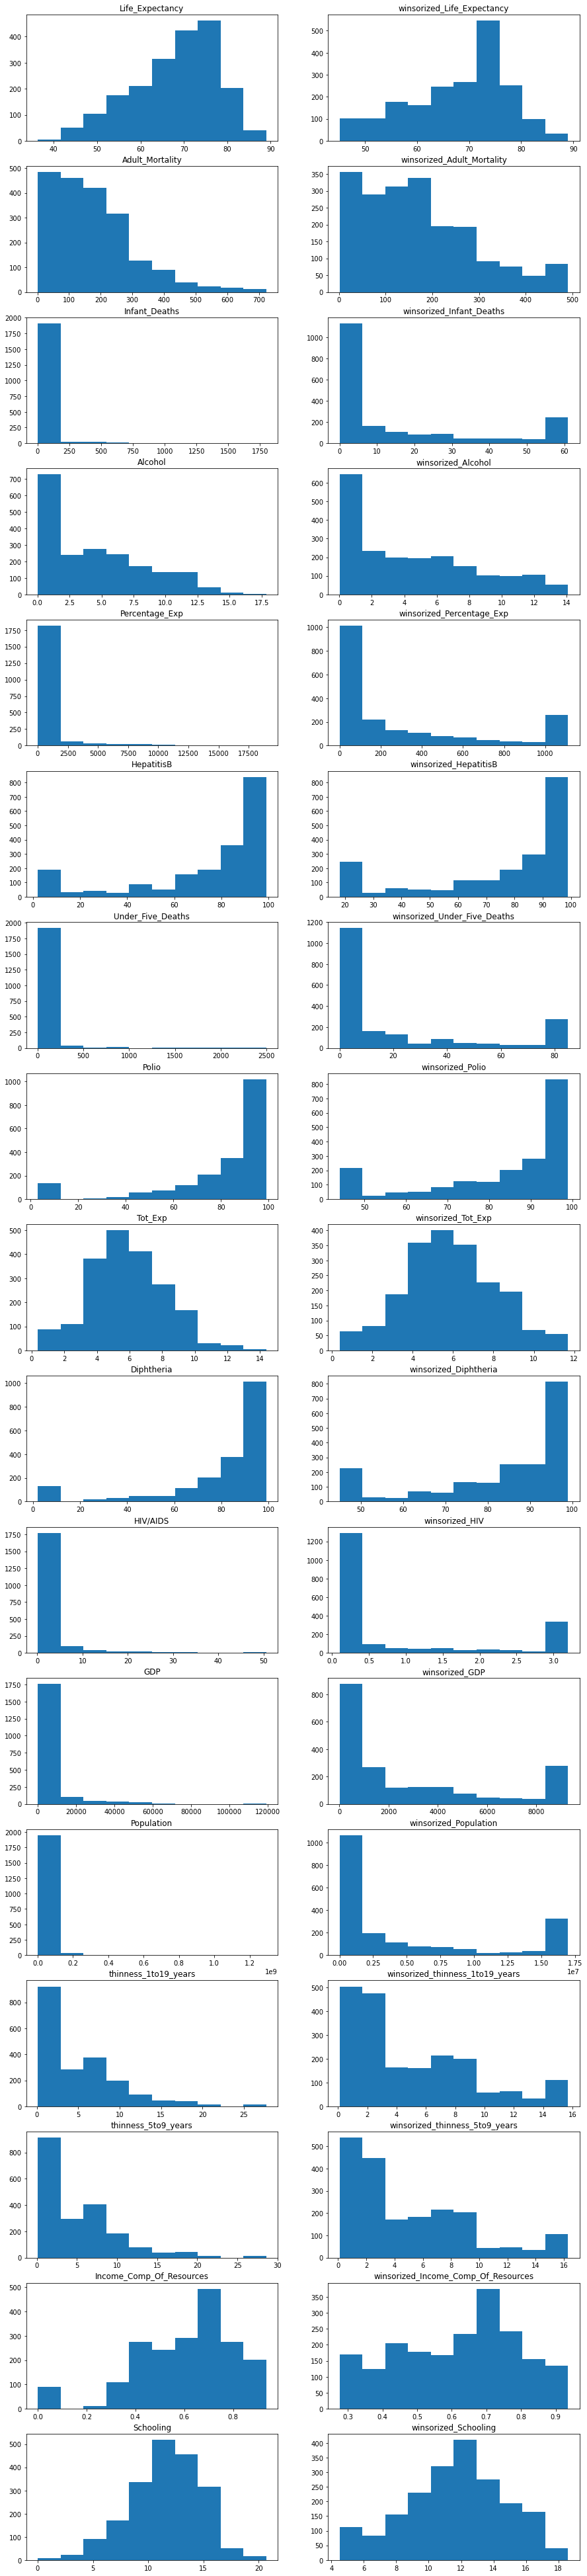

In [33]:
# Distribution of each numerical variable.
all_col = ['Life_Expectancy','winsorized_Life_Expectancy','Adult_Mortality','winsorized_Adult_Mortality','Infant_Deaths',
         'winsorized_Infant_Deaths','Alcohol','winsorized_Alcohol','Percentage_Exp','winsorized_Percentage_Exp','HepatitisB',
         'winsorized_HepatitisB','Under_Five_Deaths','winsorized_Under_Five_Deaths','Polio','winsorized_Polio','Tot_Exp',
         'winsorized_Tot_Exp','Diphtheria','winsorized_Diphtheria','HIV/AIDS','winsorized_HIV','GDP','winsorized_GDP',
         'Population','winsorized_Population','thinness_1to19_years','winsorized_thinness_1to19_years','thinness_5to9_years',
         'winsorized_thinness_5to9_years','Income_Comp_Of_Resources','winsorized_Income_Comp_Of_Resources',
         'Schooling','winsorized_Schooling']

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(18,2,i+1)
    plt.hist(df[all_col[i]])
    plt.title(all_col[i])

plt.show()

In [34]:
#winsorized_Life_Expectancy, winsorized_Tot_Exp, winsorized_Schooling are some what normally distributed :::RESULT:::

In [35]:
# Descriptive statistics of categorical variables.
df.describe(include=['O'])

,Country,Status
count,1987,1987
unique,133,2
top,Albania,Developing
freq,16,1702


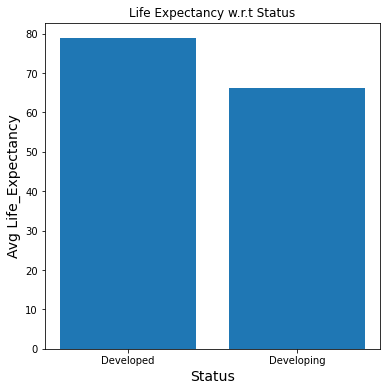

In [36]:
#Corelation 
# Life_Expectancy w.r.t Status using bar plot.
plt.figure(figsize=(6,6))
plt.bar(df.groupby('Status')['Status'].count().index,df.groupby('Status')['winsorized_Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=14)
plt.ylabel("Avg Life_Expectancy",fontsize=14)
plt.title("Life Expectancy w.r.t Status")
plt.show()

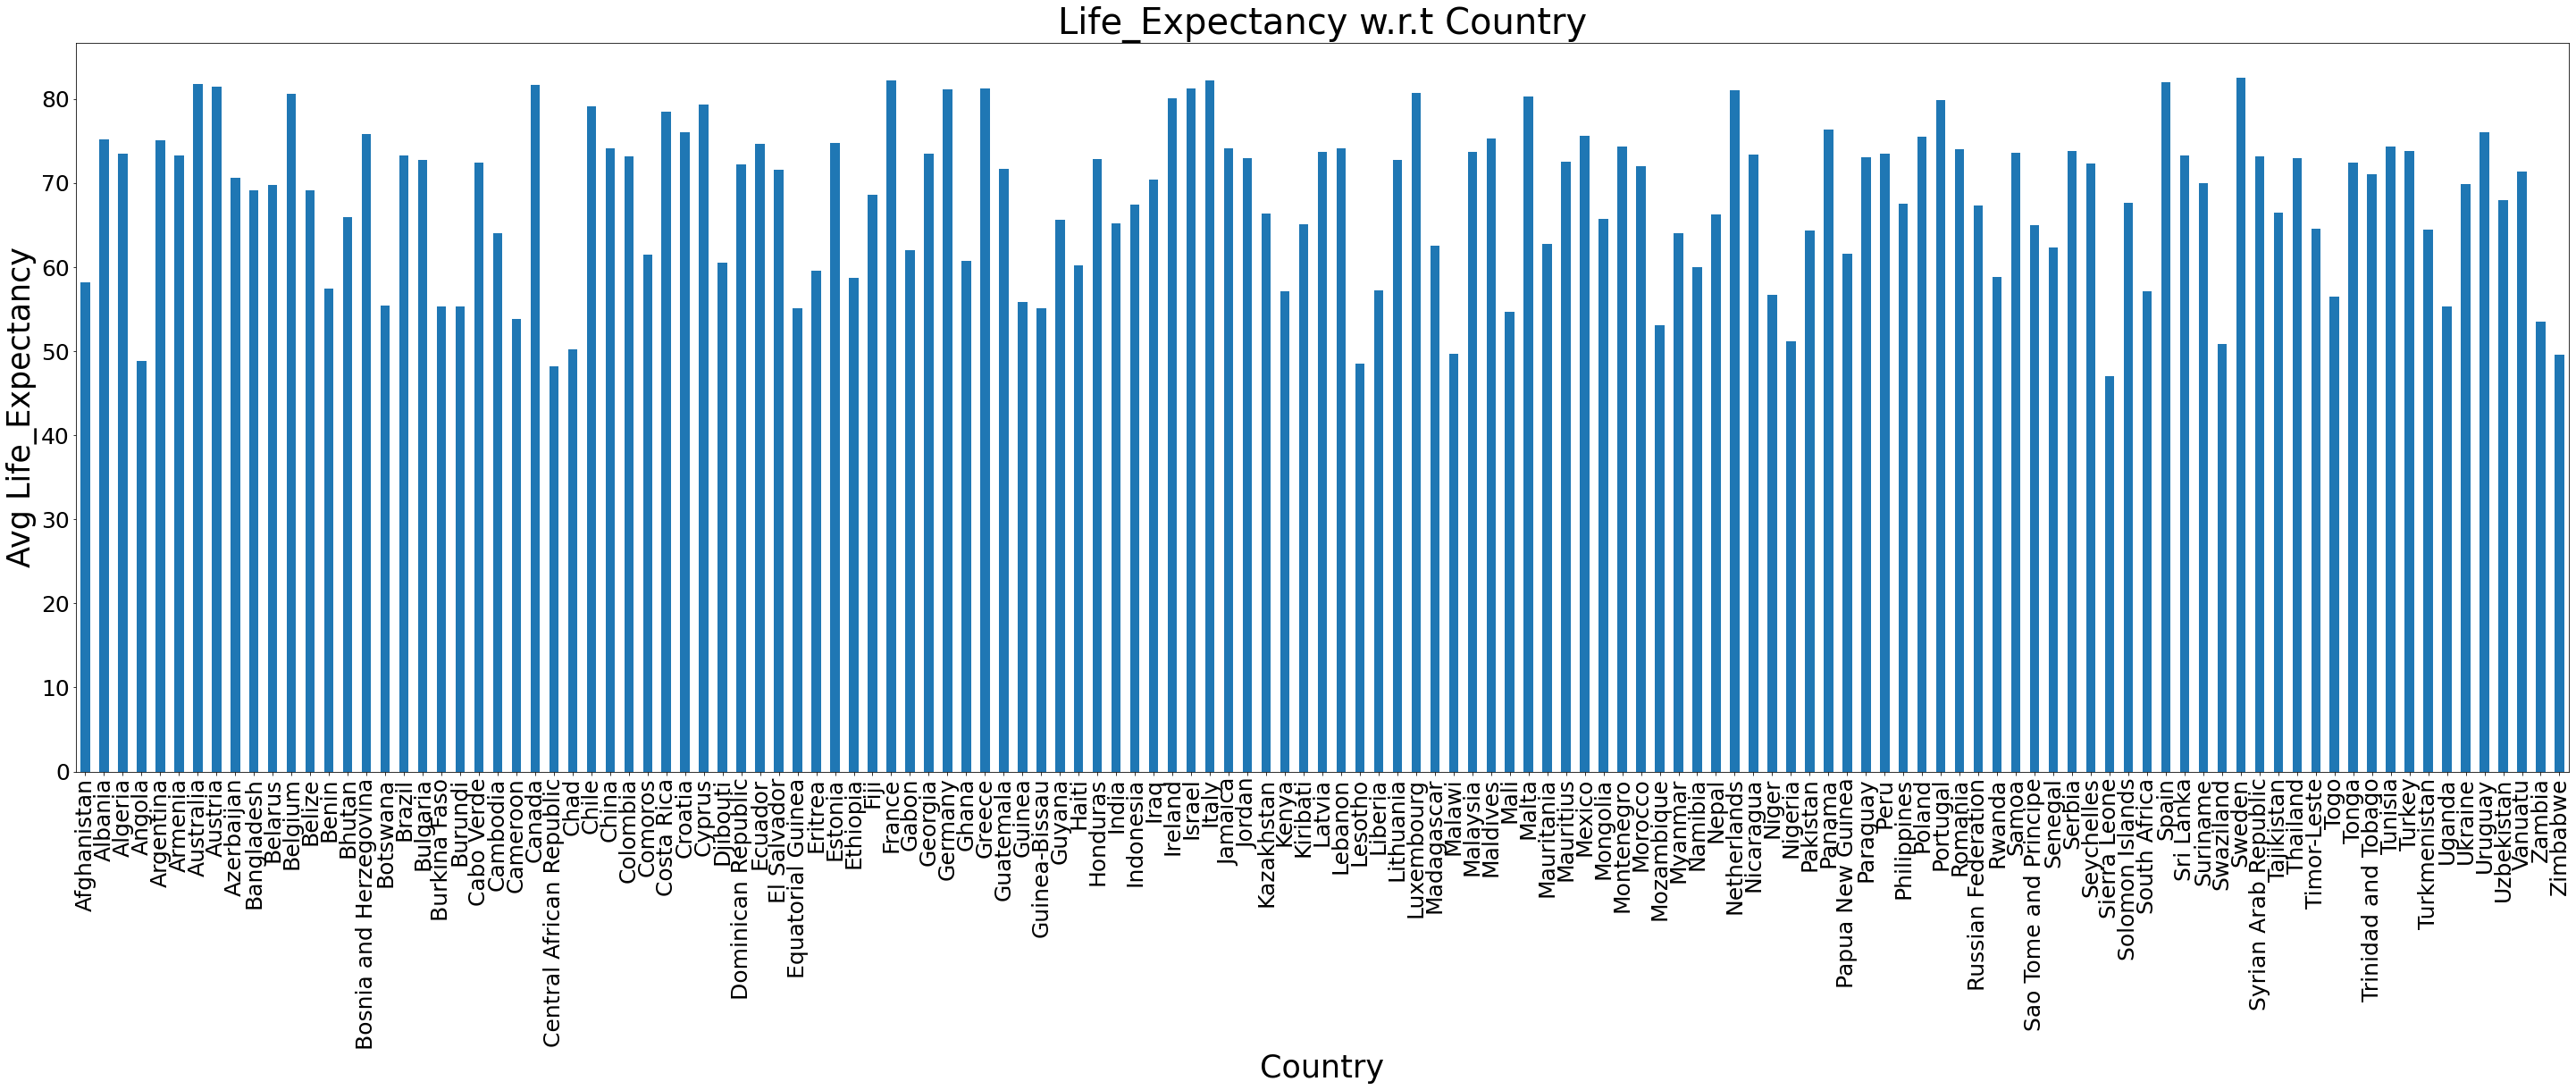

In [37]:
# Life_Expectancy w.r.t Country using bar plot.
le_country = df.groupby('Country')['winsorized_Life_Expectancy'].mean()
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life_Expectancy w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

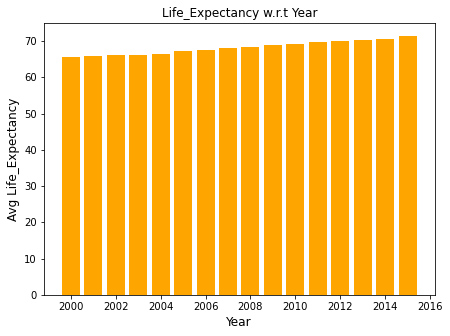

In [38]:
# Life_Expectancy w.r.t Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(df.groupby('Year')['Year'].count().index,df.groupby('Year')['winsorized_Life_Expectancy'].mean(),color='orange')
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

Text(0.5, 1.0, 'LifeExpectancy vs Schooling')

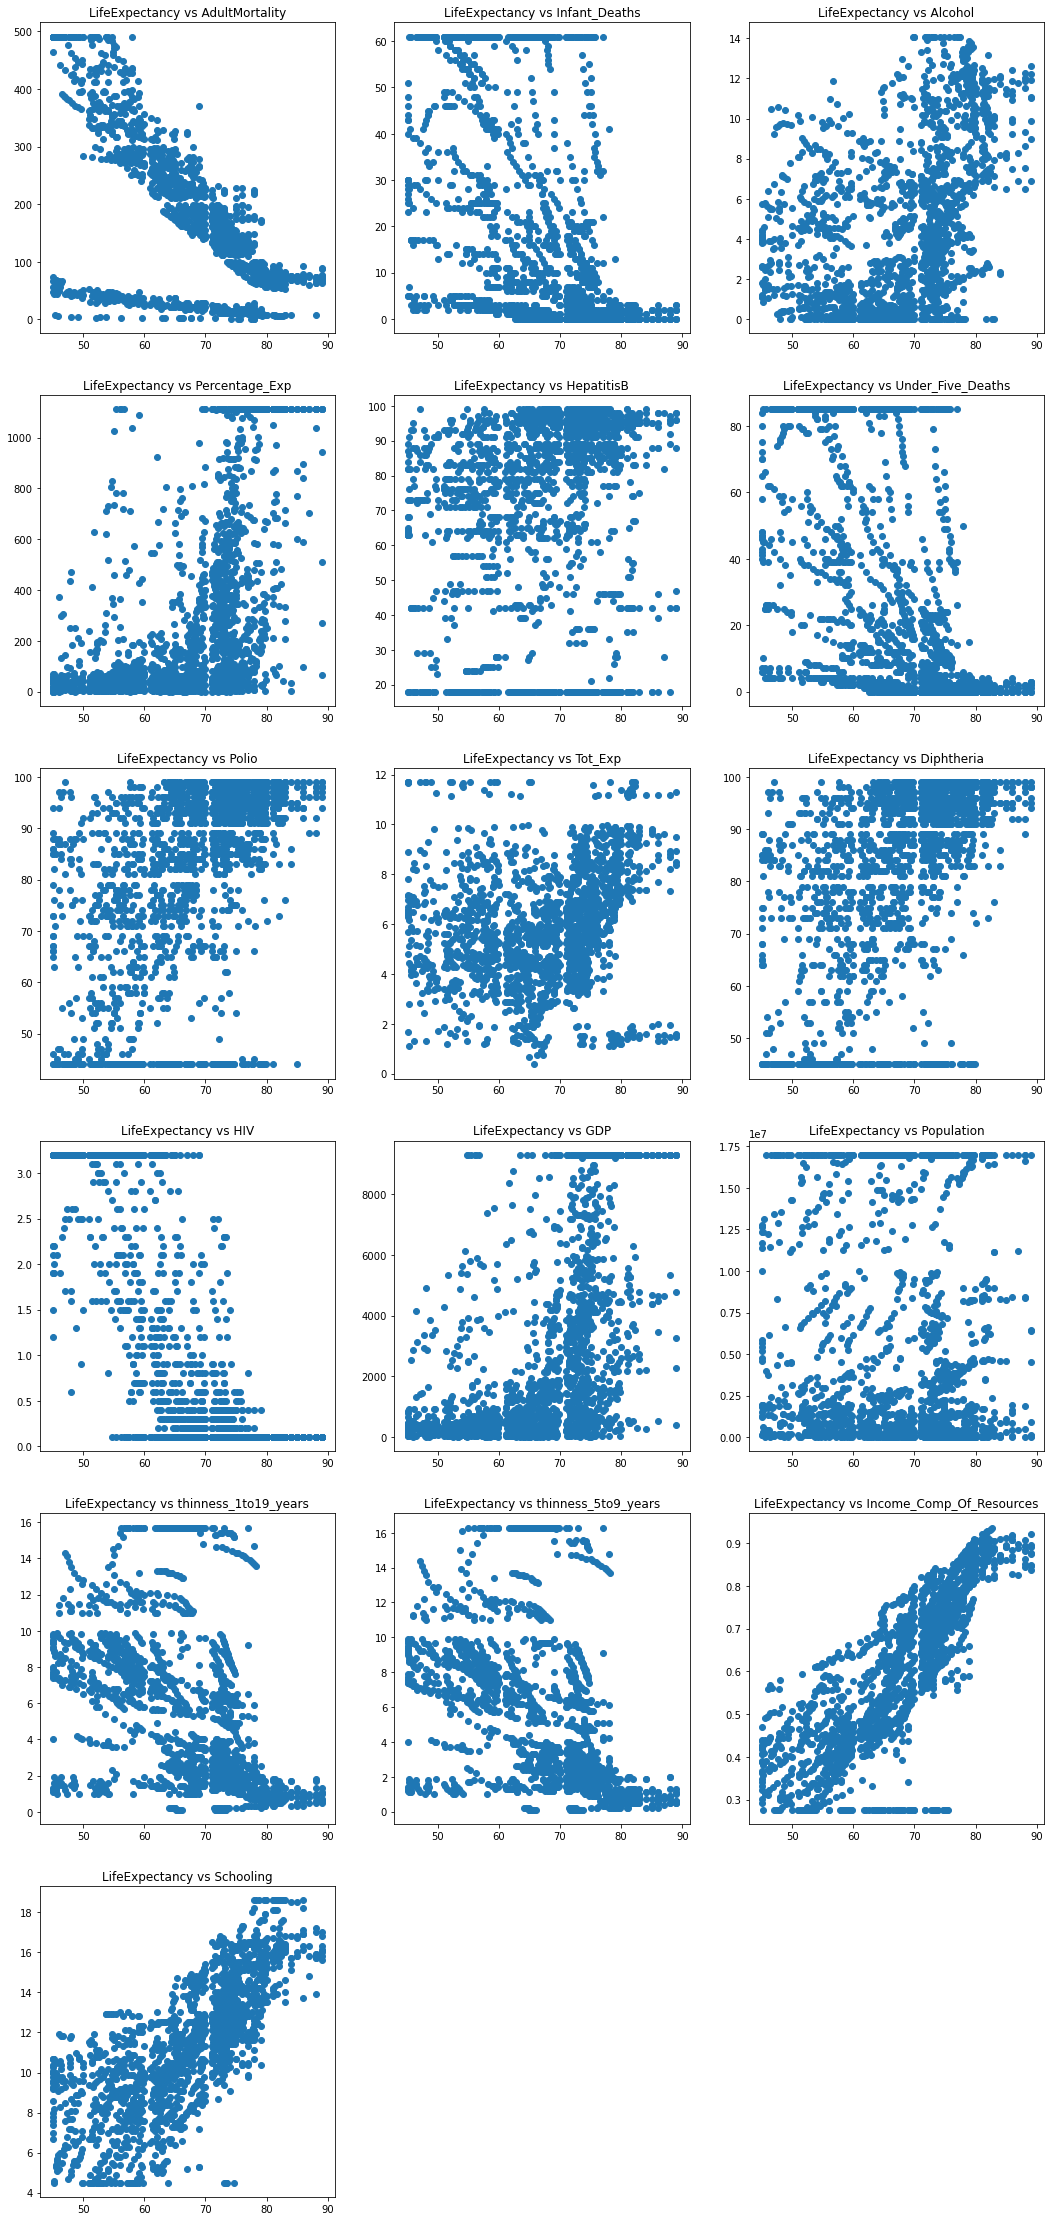

In [39]:
# Scatter plot between the target variable(winsorized_Life_Expectancy) and all continuous variables.
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Infant_Deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Percentage_Exp"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_HepatitisB"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Under_Five_Deaths"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Tot_Exp"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_HIV"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_thinness_1to19_years"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,14)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_thinness_5to9_years"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,15)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Income_Comp_Of_Resources"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.scatter(df["winsorized_Life_Expectancy"], df["winsorized_Schooling"])
plt.title("LifeExpectancy vs Schooling")

#plt.subplot(6,3,16)
#plt.scatter( df["Status"],df["winsorized_Life_Expectancy"])
#plt.title("LifeExpectancy vs status")

#plt.show()

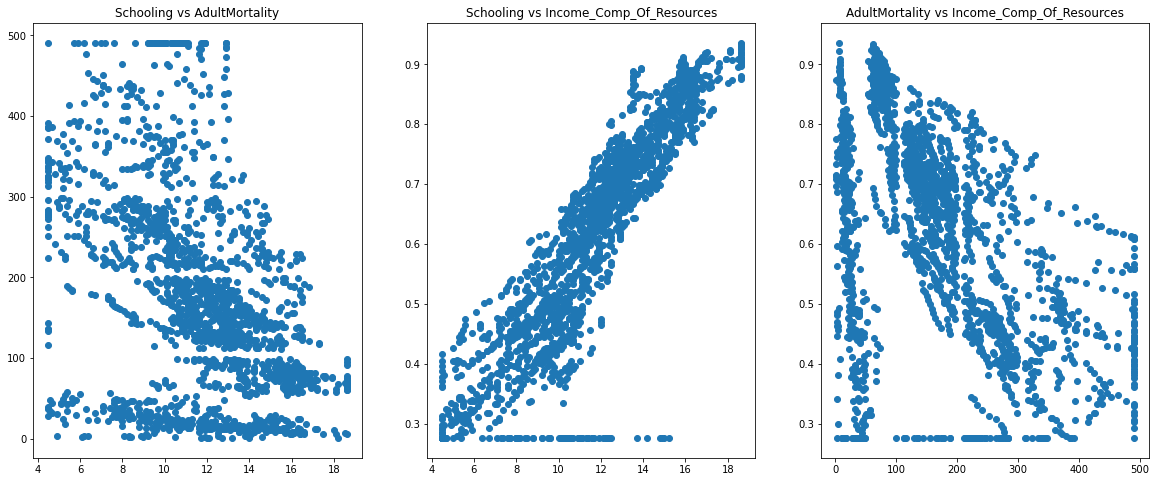

In [40]:
#Observation:
#Life_Expectancy has somewhat Negative relationship with AdultMortality.
#Life_Expectancy has positive relationship with Income_Comp_Of_Resources  and Schooling. #Income composition of resources
#If there exists any correlation among 
#the variables that are related to the target variable(winsorized_Life_Expectancy).
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.scatter(df["winsorized_Schooling"], df["winsorized_Adult_Mortality"])
plt.title("Schooling vs AdultMortality")

plt.subplot(1,3,2)
plt.scatter(df["winsorized_Schooling"], df["winsorized_Income_Comp_Of_Resources"])
plt.title("Schooling vs Income_Comp_Of_Resources")

plt.subplot(1,3,3)
plt.scatter(df["winsorized_Adult_Mortality"], df["winsorized_Income_Comp_Of_Resources"])
plt.title("AdultMortality vs Income_Comp_Of_Resources")

plt.show()


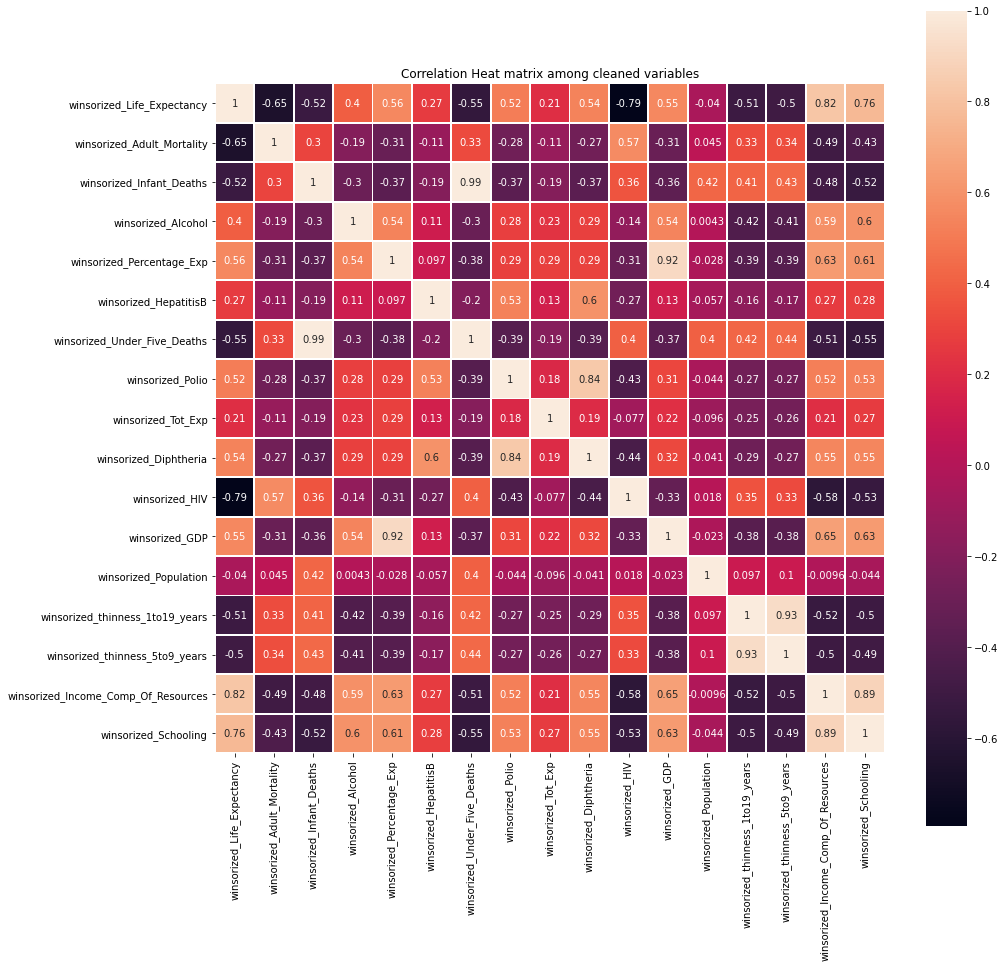

In [41]:
# Correlation of winsorized variables
import seaborn as sns
df_win = df.iloc[:,21:]
df_win['Country'] = df['Country']
df_win['Year'] = df['Year']
df_win['Status'] = df['Status']
df_win_num = df_win.iloc[:,:-3]
cormat = df_win_num.corr()  #.corr() is used to find the pairwise correlation of all columns in the dataframe


plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.85)
plt.title("Correlation Heat matrix among cleaned variables")
plt.show()

In [42]:
""""Observations:

winsorized_Income_Comp_Of_Resources is correlated with winsorized_Schooling. =0.89
winsorized_thinness_1to19_years and winsorized_thinness_5to9_years are correlated.=0.93
winsorized_Polio and winsorized_Diphtheria are correlated. =0.84
winsorized_Percentage_Exp and winsorized_GDP are correlated.=0.92
winsorized_Income_Comp_Of_Resources and winsorized_Life_Expectancy are correlated.=0.82
winsorized_Life_Expectancy and winsorized_Schooling are correlated.=0.89
winsorized_Infant_Deaths and winsorized_Under_Five_Deaths are correlated.=0.99
winsorized_HIV has negative relation with winsorized_Life_Expectancy.=-0.79
winsorized_Adult_Mortality has negative relation with winsorized_Life_Expectancy.-0.65
"""

'"Observations:\n\nwinsorized_Income_Comp_Of_Resources is correlated with winsorized_Schooling. =0.89\nwinsorized_thinness_1to19_years and winsorized_thinness_5to9_years are correlated.=0.93\nwinsorized_Polio and winsorized_Diphtheria are correlated. =0.84\nwinsorized_Percentage_Exp and winsorized_GDP are correlated.=0.92\nwinsorized_Income_Comp_Of_Resources and winsorized_Life_Expectancy are correlated.=0.82\nwinsorized_Life_Expectancy and winsorized_Schooling are correlated.=0.89\nwinsorized_Infant_Deaths and winsorized_Under_Five_Deaths are correlated.=0.99\nwinsorized_HIV has negative relation with winsorized_Life_Expectancy.=-0.79\nwinsorized_Adult_Mortality has negative relation with winsorized_Life_Expectancy.-0.65\n'

In [43]:
round(df[['Status','Life_Expectancy']].groupby(['Status']).mean(),2)

,Life_Expectancy
Status,
Developed,78.83
Developing,66.16


In [44]:
 #Finding the significance of difference of Average_Life_Expectancy between Developed and Developing countries using 
# t-test
#we are using T test because data is not normally distributed between winsorized_life_excpectancy vs status(Developed/Developing)
import scipy.stats as stats
stats.ttest_ind(df.loc[df['Status']=='Developed','Life_Expectancy'],df.loc[df['Status']=='Developing','Life_Expectancy'])

Ttest_indResult(statistic=22.92439377113489, pvalue=2.2504696584331004e-103)

In [45]:
#P-value is less than .05 ,Hence 
#the difference of Average_Life_Expectancy between Developed and Developing countries is significant.

In [46]:
""""As per the correlation heatmap, it
is clear that the following fields are correlated with winsorized_Life_Expectancy.

winsorized_Schooling
winsorized_Income_Comp_Of_Resources
winsorized_HIV
winsorized_Adult_Mortality"""

'"As per the correlation heatmap, it\nis clear that the following fields are correlated with winsorized_Life_Expectancy.\n\nwinsorized_Schooling\nwinsorized_Income_Comp_Of_Resources\nwinsorized_HIV\nwinsorized_Adult_Mortality'

In [47]:
''' Also it is to be noticed that winsorized_Income_Comp_Of_Resources is correlated with winsorized_Schooling.
 hence let us eliminate one of these based on the correlation(because two of them are corelated)
value w.r.t winsorized_Life_Expectancy.
 
 
 #checking which is more correlated to winsorized_Life_expectancy
 
winsorized_Income_Comp_Of_Resources corr with winsorized_Life_Expectancy = 0.82
winsorized_Schooling corr with winsorized_Life_Expectancy = 0.76
'''

# WE can eliminate winsorized_Schooling as it has relatively low correlation factor.
#Also, we can choose 'Status' as an important feature based on the above analysis.
"""
status (Developed/developing)
winsorized_Income_Comp_Of_Resources
winsorized_HIV
winsorized_Adult_Mortality
"""
#Above fields are related to winsorized_Life_expectancy





'\nstatus (Developed/developing)\nwinsorized_Income_Comp_Of_Resources\nwinsorized_HIV\nwinsorized_Adult_Mortality\n'

In [48]:
df.to_csv('Life_expectancy_cleaned.csv') 